<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>Multiple regression with the problem of correlated predictors</h1>
### Brian Mapes, MPO624, Spring 2018

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

## Deep in a rainforest, where it rains every day, 
### convective rainfall (the daily total, in cm) depends on many factors or _ingredients_. 

Two main ones are Lapse Rate (LR, in K/km) and Precipitable Water (PW in mm). These are _correlated_: unstable days are also moist days!

Others include the happenstance of turbulent triggering processes, etc. Also convection may have _nonlinear_ dependences on factors, which could be Taylor expanded as dependence on $LR^2, PW^2, LR \times PW$, etc. etc. All these other and nonlinear terms can be lumped together as "other". 

#### So let's build nature's secret process as a sum of 3 factors: LR, PW, and 'other'. 

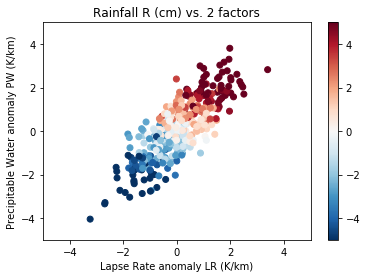

In [3]:
# Building Nature's secret reality. Don't look, this is mysterious. (OK, yeah, I am using random numbers)
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# Let's make some weather: 365 days. Remember, LR and PW are correlated!
N=365

# The factors that govern rainfall R. Don't look! Nature is secretly a random number generator!
LR = np.random.randn(N); ntosig = 0.8 ; PW = LR + np.random.randn(N)*ntosig; other = np.random.randn(N)
R = 1.0*LR + 2.0*PW + other
   
fig,ax=plt.subplots(1,1)
cs = ax.scatter(LR, PW, c=R, cmap=plt.cm.RdBu_r, vmin=-5, vmax=5); plt.xlim(-5, 5); plt.ylim(-5, 5)

ax.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax.set_ylabel('Precipitable Water anomaly PW (K/km)')
ax.set_title('Rainfall R (cm) vs. 2 factors')
cbar = fig.colorbar(cs)

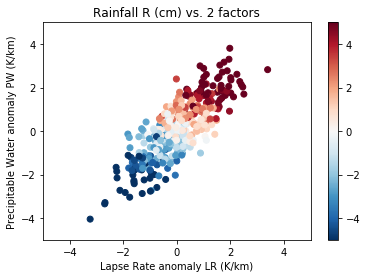

In [4]:
fig

## Intrepid scientists measure LR and PW 
### They also try to measure R, but with too few raingauges and imperfect radar

In [5]:
Rmeas_error = np.random.randn(N)*0.5
Rmeas = R + Rmeas_error

## Let's explore our dataset: LR, PW, and $R_{meas}$

Text(0,0.5,'Precipitable Water anomaly PW (mm)')

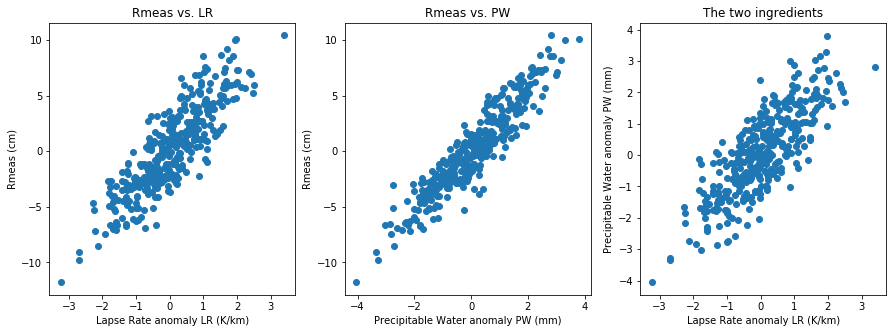

In [6]:
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(LR, Rmeas) 
ax1.set_title('Rmeas vs. LR')
ax1.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax1.set_ylabel('Rmeas (cm)')

ax2.scatter(PW, Rmeas) 
ax2.set_title('Rmeas vs. PW')
ax2.set_xlabel('Precipitable Water anomaly PW (mm)')
ax2.set_ylabel('Rmeas (cm)')

ax3.scatter(LR, PW) 
ax3.set_title('The two ingredients')
ax3.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax3.set_ylabel('Precipitable Water anomaly PW (mm)')

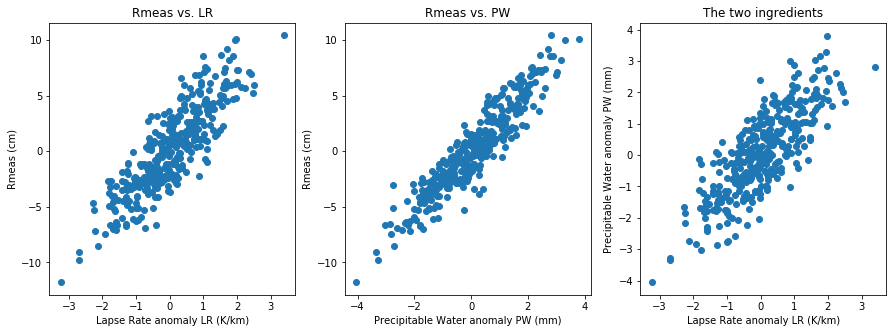

In [7]:
fig2

#### A lapse-rate extremist postulates $R_{meas} = a \times LR$ is the one true signal
#### A PW extremist postulates $R_{meas} = b \times PW$ is the one true signal 
#### A generalizer postulates $R_{meas} = c \times LR + d \times PW$ is nature's process

###  Can we adjudicate, from noisy $R_{meas}$ data, with "other" factors unmeasured? 
### Is c=a? Is d=b? 

### The LR extremist's regression

In [8]:
a = np.corrcoef(LR,Rmeas)[1,0] *np.std(Rmeas)/np.std(LR)
print('a = ',a, 'cm per (K/km)')

a =  3.1948059753554565 cm per (K/km)


## EXERCISE 1: overlay the line aLR on the Rmeas-LR scatter plot

### The PW extremist's regression

In [9]:
b = np.corrcoef(PW,Rmeas)[1,0] *np.std(Rmeas)/np.std(PW)
print('b = ',b, 'cm per (mm)')

b =  2.6778213514644387 cm per (mm)


## EXERCISE 2: overlay the line aLR on the Rmeas-LR scatter plot

### The generalizer's regression

In [10]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# FOr 2D interpolation, pack up the data in right shaped container:
indata = np.zeros( (N,2) )
indata[:,0] = LR
indata[:,1] = PW

# Fit and display
reg.fit(indata,Rmeas)
print('c, d = ', reg.coef_, 'cm per K/km, and cm per mm')

ModuleNotFoundError: No module named 'sklearn'

## EXERCISE 3: Express the above results graphically

## EXERCISE 4: Find the residuals, the _unexplained variance_ 
#### that is, $(R_{meas} - model)^2$
### for all 3 postulated models. 

## _Can you say that one model is better than another?_

## EXERCISE 5: Explain what is wrong with postulating  
### $R_{meas} = a \times LR + b \times PW$

## To do this, scatter plot its residual against $R_{meas}$. 
### _What principle about postulated models is violated?_
